## Logistic Regression
-  https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
-  https://www.javatpoint.com/logistic-regression-in-machine-learning
-  Predict a category (0/1, Yes/No) on the basis of IVs (which can be continous or categories)
-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
-  Predict Y (Dependent Variable) on the basis of Xs (Independent Variables)
-  Y : Category Value (0 or 1)
-  Xs : can be continous or discrete eg. gender, age, salary, experience in yrs etc
-  In this mtcars data set : Y (am/ tx) predict on the basis of Xs (wt, hp, mpg)
-  Steps
    -  from sklearn.linear_model import LogisticRegression
    -  model = LogisticRegression().fit(X,y)
    -  r_sq = model.score(X, y)
    -  y_pred = model.predict(X)
    -  Y_pred(new) = model.predict(X new)
-  Two Libraries - sklearn and statsmodels
    -  logreg1 - sklearn
    -  logreg2 - statsmodel
-  Case Study
    -  https://www.kaggle.com/code/vyduong11/eda-logistic-regression-to-predict-attrition
    -  https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
    -  Predict whether employee will leave or not (Attrition)

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import os

In [11]:
#options
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display

In [12]:
os.listdir('../data/trg/')
#filePath = 'https://raw.githubusercontent.com/dupadhyaya/hrAnalytics/main/data/misc/HR_employeeAttrition.csv'

['amitMIS.xlsx', 'hrAttrition.csv']

In [15]:
#data
df = pd.read_csv('../data/trg/hrAttrition.csv')
print(df.shape, '\n', df.columns.tolist(),'\n')
print(df.dtypes, '\n', df.iloc[:,[0,1,2]].head())
#147- employees with 35 columns

(1470, 35) 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatis

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.00,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.0,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.21,3.154,2.712,80.0,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.0,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.66,0.361,1.081,0.0,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.0,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.00,3.000,1.000,80.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.0,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.00,3.000,2.000,80.0,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.0,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.00,3.000,3.000,80.0,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.0,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.00,3.000,4.000,80.0,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.0,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.00,4.000,4.000,80.0,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [18]:
df.duplicated().sum()  #no duplicates

0

In [21]:
df.duplicated(subset='EmployeeNumber').sum()   #no employee no is duplicate

0

In [22]:
df['StandardHours'].value_counts()
#all have standard hours as 1 type only ie 80 (per month)

StandardHours
80    1470
Name: count, dtype: int64

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

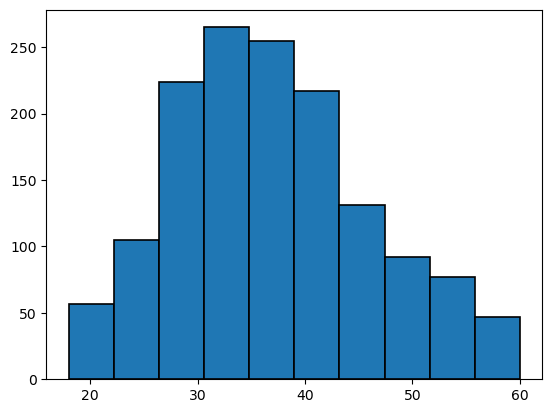

In [28]:
#df['Age'].hist(ylabelsize=10)
plt.hist(df['Age'], edgecolor='black', linewidth=1.2)

In [33]:
df['Attrition'].value_counts(normalize=True)  #normalize=True/False
#How many left

Attrition
No     0.839
Yes    0.161
Name: proportion, dtype: float64

<Axes: ylabel='count'>

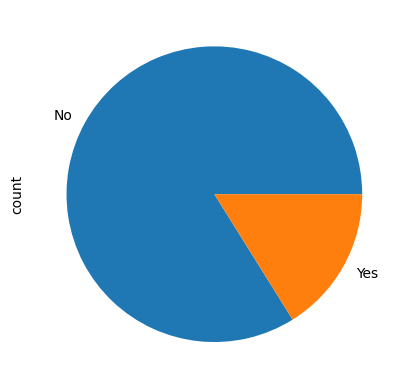

In [36]:
df['Attrition'].value_counts().plot.pie()  #subplots=True

In [37]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

array([<Axes: ylabel='count'>], dtype=object)

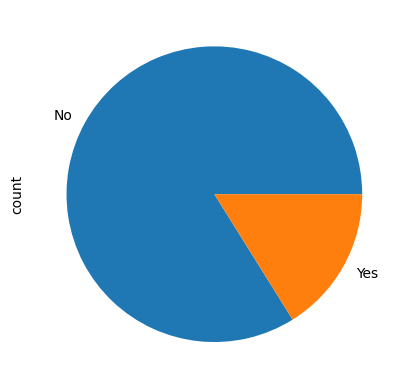

In [48]:
df['Attrition'].value_counts().plot.pie()

In [53]:
df.select_dtypes(['int64']).dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [55]:
df[['EmployeeCount','Over18','StandardHours','EmployeeNumber']].head()

,EmployeeCount,Over18,StandardHours,EmployeeNumber
0,1,Y,80,1
1,1,Y,80,2
2,1,Y,80,4
3,1,Y,80,5
4,1,Y,80,7


In [56]:
# Employercount, StandardHours,EmployeeNumber also offer no meaning
df = df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis =1)

In [108]:
df1 = df.copy()
df1.shape
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [109]:
# select variables which are rating from surveying
rating_cols = ['EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','StockOptionLevel']
cat_cols = df1.select_dtypes(['object']).columns.tolist()
num_cols = df1.select_dtypes(['number']).columns.tolist() #int64, number
print(rating_cols, '\n', cat_cols, ':: \t', len(cat_cols), '\n', num_cols ,':: \t', len(num_cols),)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'] 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] :: 	 8 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] :: 	 23


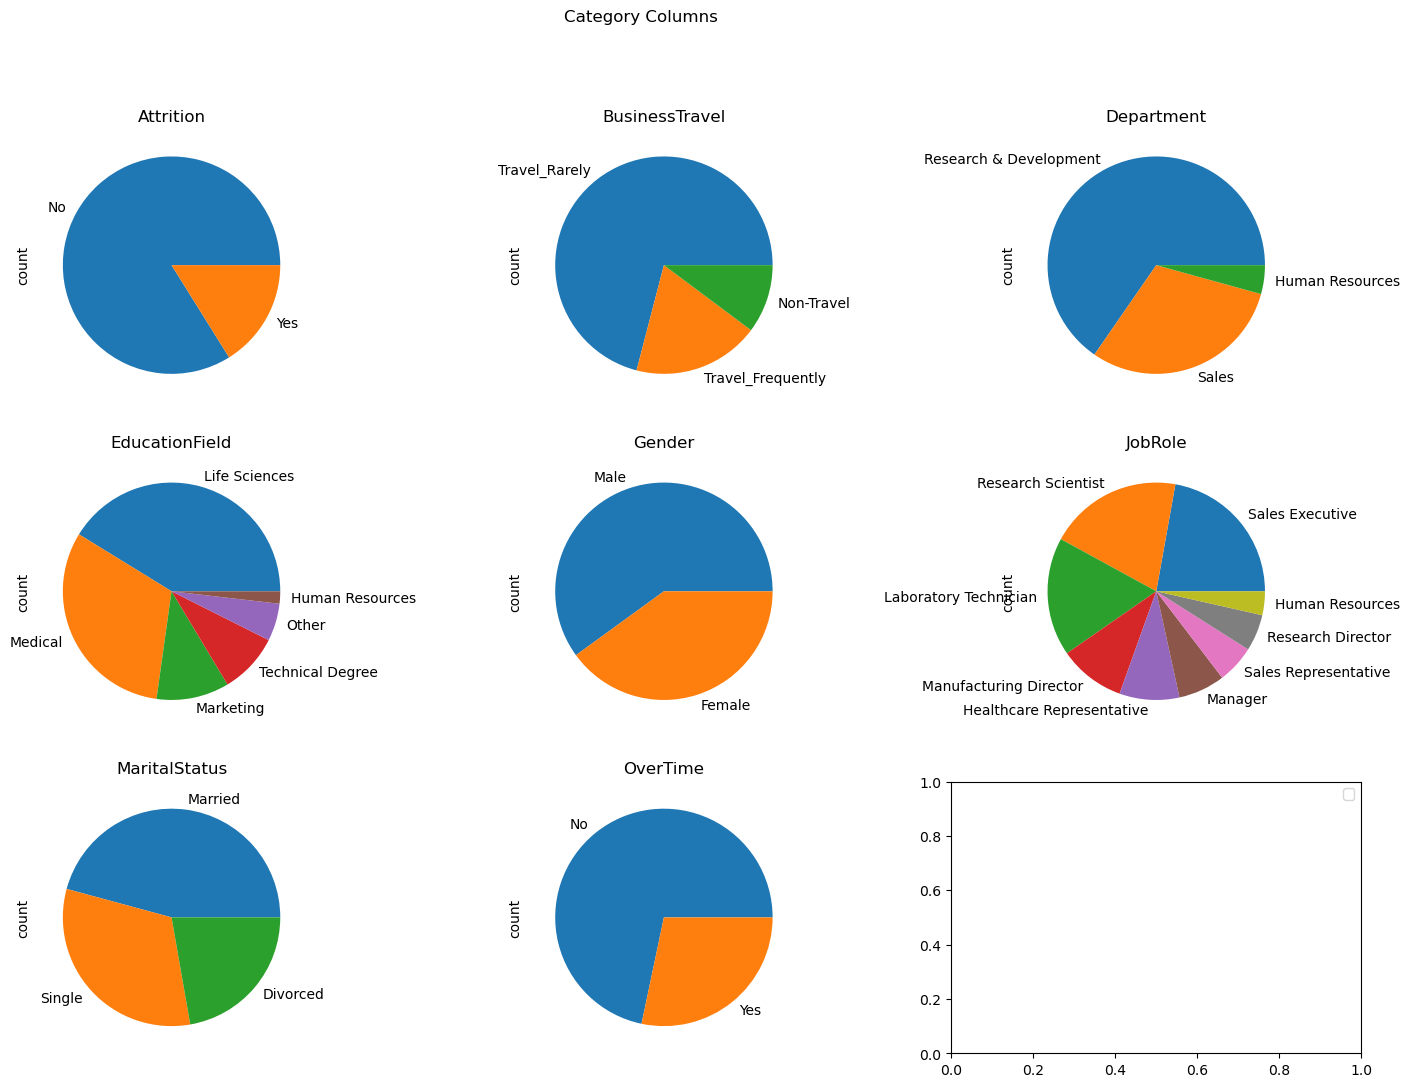

In [129]:
# assuming you have 9 (3x3) columns:
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
# use `select_dtypes` to filter instead of `describe` : O for object
fig.suptitle('Category Columns')
for col, ax in zip(df1.select_dtypes(include='O'), axes.ravel()):
    plt.legend(df1[col].value_counts().index)
    df1[col].value_counts().plot.pie(ax=ax)  # df1[col].value_counts().plot.bar(ax=ax) 
    ax.set_title(col)
plt.show()

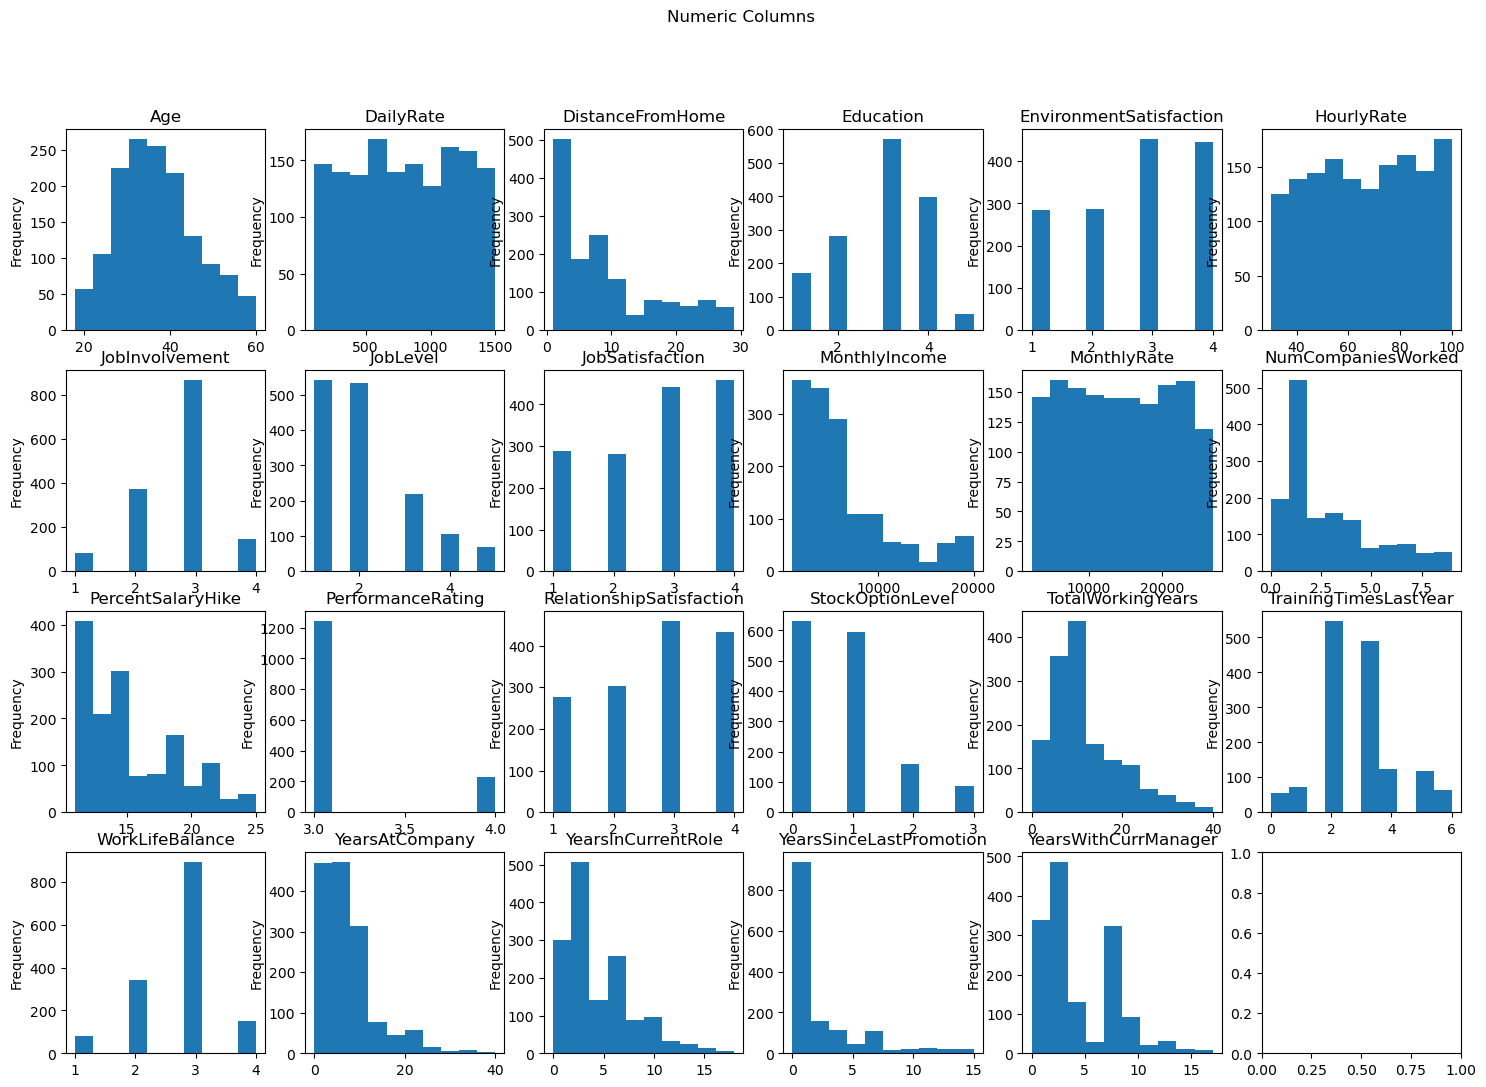

In [111]:
# assuming you have 24 (4x6) columns:
fig,axes = plt.subplots(nrows=4, ncols=6, figsize=(18,12))
# use `select_dtypes` to filter instead of `describe` : O for object
fig.suptitle('Numeric Columns')
for col, ax in zip(df1.select_dtypes(include='number'), axes.ravel()):
    df1[col].plot.hist(ax=ax)
    ax.set_title(col)
plt.show()

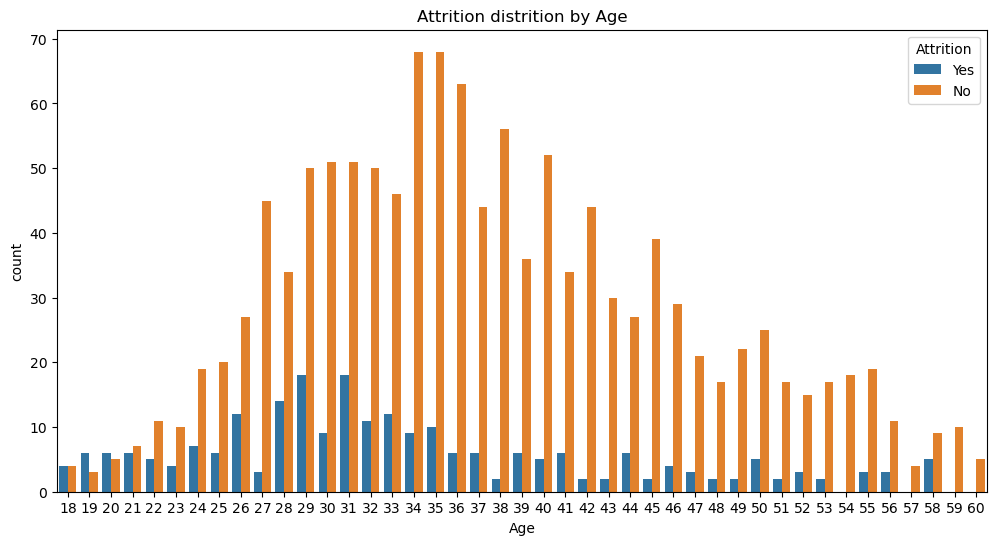

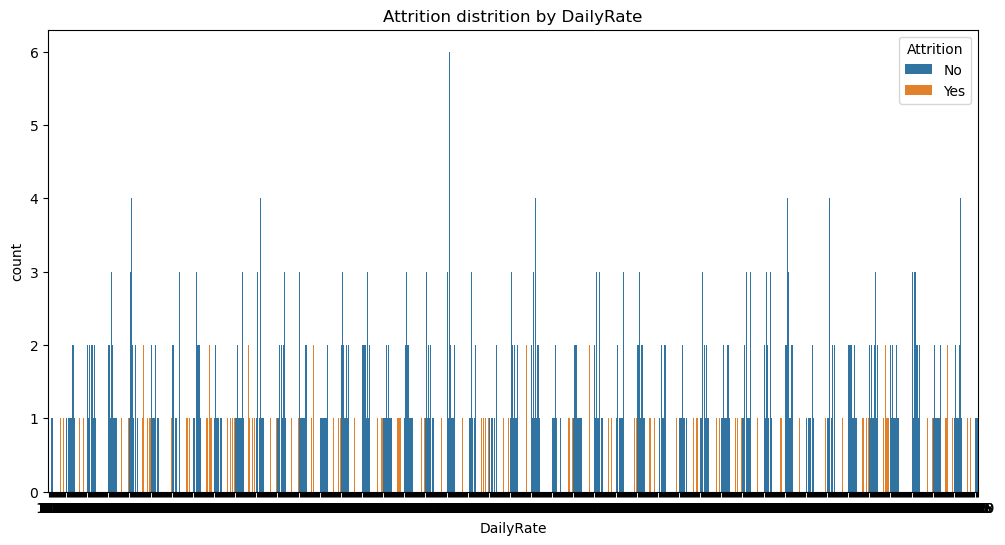

In [138]:
#plot by attrition
for col in num_cols[0:2]:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=df1)
    plt.title("Attrition distrition by " + col)
    plt.show()

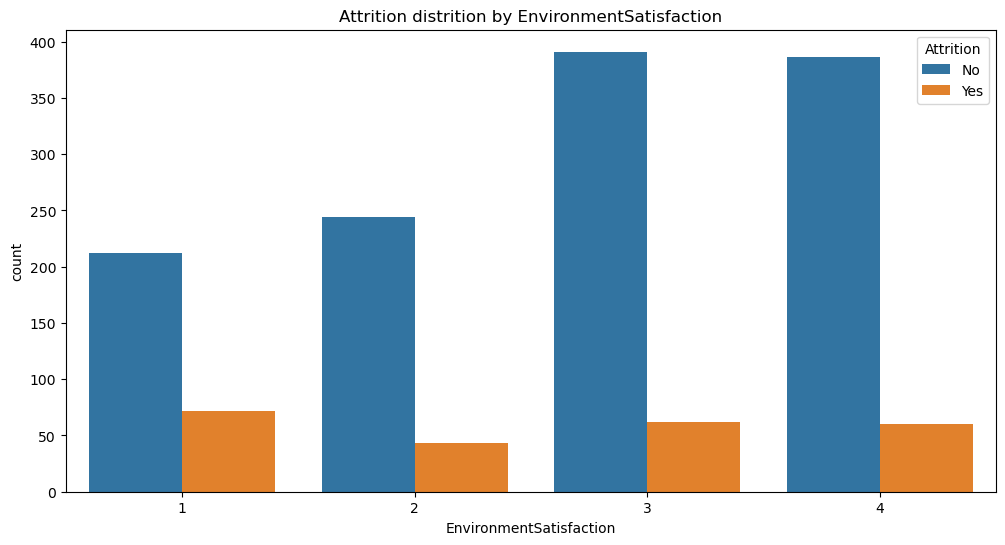

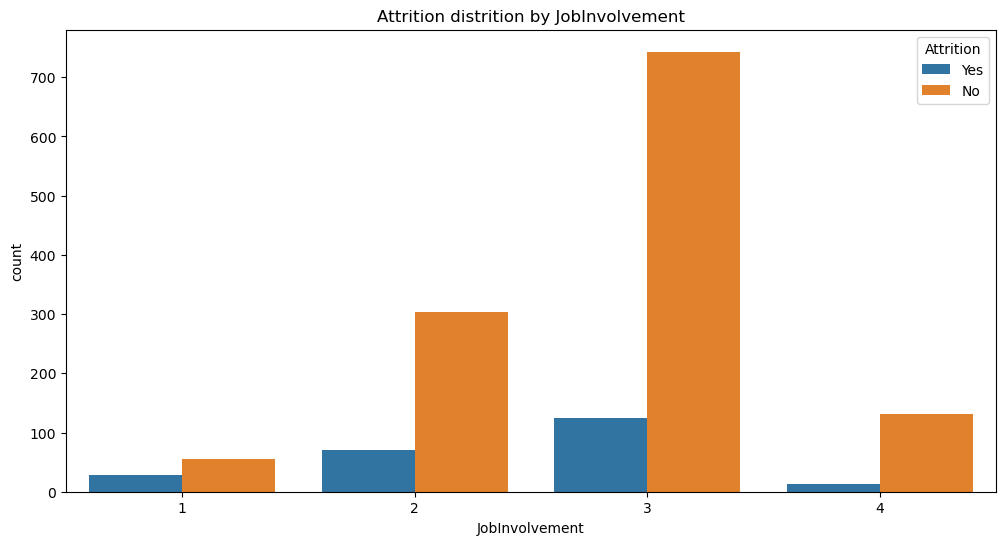

In [139]:
for col in rating_cols[0:2]:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=df1)
    plt.title("Attrition distrition by " + col)
    plt.show()

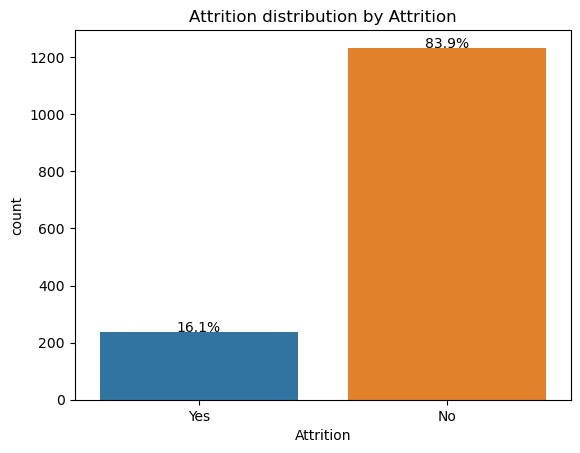

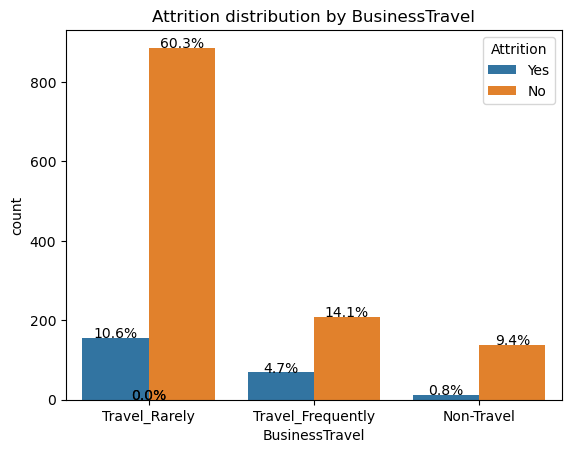

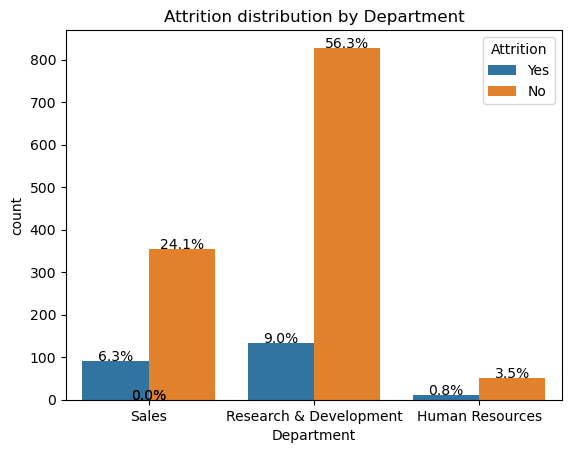

In [143]:
for col in cat_cols[0:3]:
    sns.countplot(x=col, hue='Attrition', data=df1)
    plt.title("Attrition distribution by " + col)
    ax = plt.gca()
    total_height = len(df['Attrition'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        
    plt.show()

In [146]:
from sklearn.model_selection import train_test_split  #split

In [147]:
#additional libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
#seaborn to create confusion matrix

In [151]:
label_encoder = LabelEncoder()
df[cat_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [155]:
# for cat value , put number
for col in cat_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
df1[cat_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


In [157]:
df1.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 31 entries, Age to YearsWithCurrManager
dtypes: int32(8), int64(23)
memory usage: 310.2 KB


In [239]:
#select few variable or all
selCols = ['Attrition', 'BusinessTravel','DistanceFromHome','Education','Gender', 'JobSatisfaction', 'MonthlyIncome']
#df2 = df1[selCols].copy()
df2 = df1.copy()
X = df2.drop(columns='Attrition')
y = df2.Attrition
print(X.shape, y.shape)

(1470, 30) (1470,)


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 107, stratify=df2['Attrition'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 30) (441, 30) (1029,) (441,)


In [241]:
#row = train + test rows  : 1029 + 441 = 1470
print(y_train.value_counts(normalize=True), ' Test ', y_test.value_counts(normalize=True))

Attrition
0    0.839
1    0.161
Name: proportion, dtype: float64  Test  Attrition
0    0.839
1    0.161
Name: proportion, dtype: float64


In [242]:
pd.concat([y_train.head(), X_train.head()], axis=1)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
633,0,36,2,1278,0,8,3,1,1,1,77,2,1,1,1,1,2342,8635,0,0,21,4,3,0,6,3,3,5,4,0,3
205,1,29,2,121,2,27,3,2,2,0,35,3,3,7,4,1,7639,24525,1,0,22,4,4,3,10,3,2,10,4,1,9
727,0,18,0,287,1,5,2,1,2,1,73,3,1,6,4,2,1051,13493,1,0,15,3,4,0,0,2,3,0,0,0,0
864,1,41,0,906,1,5,2,1,1,1,95,2,1,6,1,0,2107,20293,6,0,17,3,1,1,5,2,1,1,0,0,0
954,0,42,0,495,1,2,1,1,3,1,37,3,4,3,3,1,17861,26582,0,1,13,3,4,0,21,3,2,20,8,2,10


In [243]:
#ogreg1 = LogisticRegression(solver='liblinear', random_state=123).fit(X,y)
logreg1 = LogisticRegression(random_state=123, max_iter=100000).fit(X,y)

In [244]:
print(' Classes ', logreg1.classes_, '\n : Coeff ', np.round(logreg1.coef_,2).tolist(), '\n : Intercept ', logreg1.intercept_)
print(X_train.columns)

 Classes  [0 1] 
 : Coeff  [[-0.02, 0.16, -0.0, 0.48, 0.04, 0.05, 0.08, -0.37, 0.38, 0.0, -0.47, -0.06, -0.02, -0.34, 0.62, -0.0, 0.0, 0.18, 1.75, -0.03, 0.44, -0.2, -0.19, -0.07, -0.14, -0.18, 0.12, -0.15, 0.14, -0.13]] 
 : Intercept  [0.17757055]
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')


In [246]:
print(logreg1.predict_proba(X_train)[1:5])
print(logreg1.predict(X_train)[1:5])
print(y_train[1:5])
print('\n')
print(logreg1.predict_proba(X_test)[1:5])

[[0.96329484 0.03670516]
 [0.85051011 0.14948989]
 [0.56290224 0.43709776]
 [0.98658578 0.01341422]]
[0 0 0 0]
205    1
727    0
864    1
954    0
Name: Attrition, dtype: int64


[[0.93206953 0.06793047]
 [0.94755121 0.05244879]
 [0.98928645 0.01071355]
 [0.80198217 0.19801783]]


In [247]:
y_pred_train = logreg1.predict(X_train)
y_pred_test  = logreg1.predict(X_test)
print(y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


array([[355,  15],
       [ 47,  24]], dtype=int64)

<Axes: >

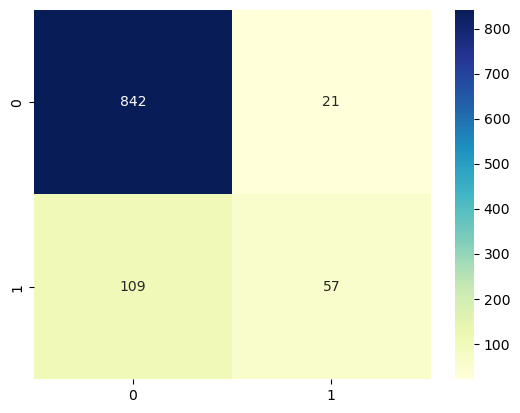

In [248]:
sns.heatmap(pd.DataFrame(cm_train), annot=True, cmap="YlGnBu" ,fmt='g')

<Axes: >

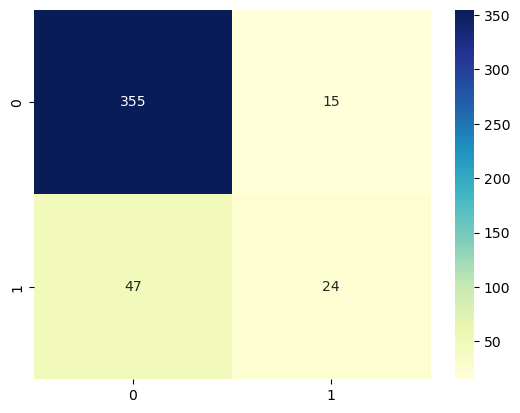

In [249]:
sns.heatmap(pd.DataFrame(cm_test), annot=True, cmap="YlGnBu" ,fmt='g')

In [250]:
newData2 = df2.sample(10)
newData2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1106,30,1,2,740,2,1,3,1,2,1,64,2,2,7,1,1,9714,5323,1,0,11,3,4,1,10,4,3,10,8,6,7
494,34,0,2,204,2,14,3,5,3,0,31,3,1,8,3,0,2579,2912,1,1,18,3,4,2,8,3,3,8,2,0,6
298,36,0,1,566,1,18,4,1,3,1,81,4,1,2,4,1,3688,7122,4,0,18,3,4,2,4,2,3,1,0,0,0
681,38,0,2,1333,1,1,3,5,4,0,80,3,3,5,1,1,13582,16292,1,0,13,3,2,1,15,3,3,15,12,5,11
771,54,0,2,1082,2,2,4,1,3,0,41,2,3,7,3,1,10686,8392,6,0,11,3,2,1,13,4,3,9,4,7,0
443,22,1,1,1368,1,4,1,5,3,1,99,2,1,2,3,2,3894,9129,5,0,16,3,3,0,4,3,3,2,2,1,2
1425,33,0,2,501,1,15,2,3,2,0,95,3,2,0,4,1,4878,21653,0,1,13,3,1,1,10,6,3,9,7,8,1
141,45,0,2,1316,1,29,3,3,3,1,83,3,1,6,4,2,3452,9752,5,0,13,3,2,0,9,2,2,6,5,0,3
592,47,0,2,202,1,2,2,4,3,0,33,3,4,3,4,1,16752,12982,1,1,11,3,3,1,26,3,2,26,14,3,0
53,35,0,0,1097,1,11,2,3,3,1,79,2,3,0,1,1,9884,8302,2,1,13,3,3,1,10,3,3,4,0,2,3


In [251]:
logreg1.predict_proba(newData2.drop(columns='Attrition'))

array([[0.93254923, 0.06745077],
       [0.89157833, 0.10842167],
       [0.95902823, 0.04097177],
       [0.99560506, 0.00439494],
       [0.87698106, 0.12301894],
       [0.75850764, 0.24149236],
       [0.65974561, 0.34025439],
       [0.79922402, 0.20077598],
       [0.9671692 , 0.0328308 ],
       [0.67011416, 0.32988584]])

In [252]:
logreg1.predict(newData2.drop(columns='Attrition'))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [253]:
logreg1.predict_proba(X)[0:10]
#predict probabilities of each row value of X

array([[0.31203213, 0.68796787],
       [0.97608688, 0.02391312],
       [0.38143673, 0.61856327],
       [0.86969123, 0.13030877],
       [0.66413667, 0.33586333],
       [0.97993341, 0.02006659],
       [0.77581997, 0.22418003],
       [0.91888778, 0.08111222],
       [0.96034995, 0.03965005],
       [0.90434318, 0.09565682]])

In [254]:
print(y_train.value_counts())

Attrition
0    863
1    166
Name: count, dtype: int64


In [259]:
y_pred = logreg1.predict(X_train)
y_pred
print('Predicted values of Attrition (Y) from IV (..........) \n: ', y_predLG1.tolist())
#print(y_pred.value_counts())
#predict class (0 or 1)

Predicted values of Attrition (Y) from IV (..........) 
:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [260]:
logreg1.score(X,y)
#9 times out of 10, model predicts right category

0.8693877551020408

In [261]:
logreg1.predict(newData2.drop(columns='Attrition', axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [262]:
#check accuracy of the model
confusion_matrix(y_test, y_pred_test)

array([[355,  15],
       [ 47,  24]], dtype=int64)

In [263]:
pd.concat([y_test.reset_index(), pd.Series(y_pred_test)],axis=1, ignore_index=True).head(10)

,0,1,2
0,327,1,0
1,875,0,0
2,145,0,0
3,185,0,0
4,310,0,0
5,1249,1,1
6,1054,0,0
7,1383,0,0
8,779,1,0
9,1318,0,0


<Axes: >

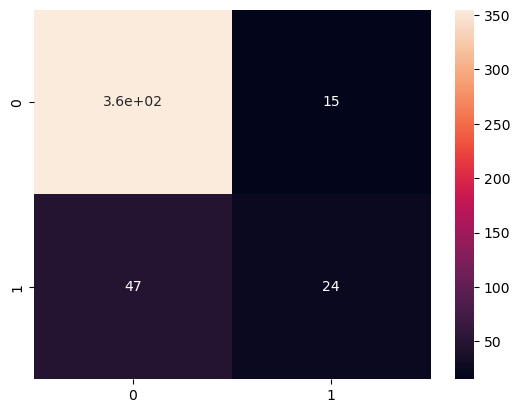

In [266]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
cm = confusion_matrix(y_test, y_pred_test)
cm
sns.heatmap(cm, annot=True)

In [268]:
clsreport = classification_report(y_test,y_pred_test)
print('Classification Report : \n', clsreport)

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.62      0.34      0.44        71

    accuracy                           0.86       441
   macro avg       0.75      0.65      0.68       441
weighted avg       0.84      0.86      0.84       441



# Stats Model
-  https://www.statsmodels.org/stable/discretemod.html

In [269]:
#import statsmodels.api as sm
print(df2.shape, X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1470, 31) (1470, 30) (1470,) (1029, 30) (1029,) (441, 30) (441,)


In [290]:
import statsmodels.formula.api as smf
selCols = ['Attrition', 'BusinessTravel','DistanceFromHome','Education','Gender', 'JobSatisfaction', 'MonthlyIncome']
df3 = df1[selCols]

In [291]:
logreg2 = smf.logit("Attrition ~ BusinessTravel + DistanceFromHome + Education + Gender + JobSatisfaction + MonthlyIncome", data=df3).fit()

Optimization terminated successfully.
         Current function value: 0.417044
         Iterations 7


In [292]:
print(logreg2.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1463
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                 0.05581
Time:                        12:42:31   Log-Likelihood:                -613.05
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.270e-13
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4686      0.365     -1.282      0.200      -1.185       0.248
BusinessTravel       0.0104      0.109      0.095      0.924      -0.203       0.224
DistanceFromHome     0.0267 

In [293]:
print(logreg2.params)

Intercept          -0.47
BusinessTravel      0.01
DistanceFromHome    0.03
Education          -0.04
Gender              0.15
JobSatisfaction    -0.27
MonthlyIncome      -0.00
dtype: float64


In [294]:
print(dir(logreg2))  #functions available

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

In [295]:
y_pred2 = logreg2.predict(df3.drop(columns ='Attrition')).round(2)
print(y_pred2.tolist())

[0.09, 0.21, 0.2, 0.15, 0.22, 0.14, 0.25, 0.3, 0.14, 0.24, 0.3, 0.19, 0.3, 0.22, 0.3, 0.17, 0.23, 0.19, 0.03, 0.12, 0.17, 0.28, 0.08, 0.23, 0.3, 0.02, 0.3, 0.16, 0.06, 0.04, 0.15, 0.11, 0.23, 0.16, 0.15, 0.17, 0.19, 0.14, 0.23, 0.18, 0.17, 0.25, 0.3, 0.1, 0.11, 0.03, 0.22, 0.31, 0.1, 0.18, 0.14, 0.17, 0.17, 0.16, 0.17, 0.03, 0.19, 0.31, 0.11, 0.12, 0.09, 0.22, 0.03, 0.24, 0.08, 0.04, 0.18, 0.15, 0.28, 0.19, 0.12, 0.22, 0.22, 0.15, 0.13, 0.12, 0.22, 0.09, 0.06, 0.19, 0.11, 0.17, 0.06, 0.1, 0.19, 0.1, 0.3, 0.17, 0.12, 0.08, 0.06, 0.16, 0.16, 0.11, 0.15, 0.04, 0.13, 0.16, 0.06, 0.35, 0.3, 0.28, 0.13, 0.13, 0.11, 0.02, 0.03, 0.14, 0.17, 0.17, 0.14, 0.14, 0.04, 0.26, 0.17, 0.09, 0.1, 0.07, 0.13, 0.05, 0.28, 0.24, 0.2, 0.03, 0.13, 0.22, 0.08, 0.32, 0.16, 0.23, 0.22, 0.07, 0.19, 0.12, 0.27, 0.2, 0.06, 0.11, 0.17, 0.11, 0.24, 0.24, 0.13, 0.23, 0.14, 0.25, 0.15, 0.07, 0.32, 0.24, 0.24, 0.12, 0.21, 0.27, 0.07, 0.16, 0.13, 0.21, 0.06, 0.16, 0.23, 0.27, 0.22, 0.12, 0.18, 0.03, 0.24, 0.06, 0.06, 0.

In [296]:
print(type(df3.Attrition), type(y_pred2))
pd.concat([df3.Attrition, y_pred2], axis=1).head()

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


,Attrition,0
0,1,0.09
1,0,0.21
2,1,0.20
3,0,0.15
4,0,0.22


In [281]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [282]:
log_loss(df3.Attrition, y_pred2)

0.4168582390155287

In [289]:
cm_sm2 = confusion_matrix(df3.Attrition, y_pred2)
cm_sm2

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [285]:
print('Log loss = {:.5f}'.format(log_loss(df3.Attrition, y_pred2)))
print('AUC = {:.5f}'.format(roc_auc_score(df3.Attrition, y_pred2)))
print('Average Precision = {:.5f}'.format(average_precision_score(df3.Attrition, y_pred2)))

Log loss = 0.41686
AUC = 0.67014
Average Precision = 0.28302


In [286]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
disp_12 = ConfusionMatrixDisplay(cm_12, display_labels = ['No','Yes'])
disp_12.plot()
plt.title('Confustion Matrix of Model 1 with all variables on test set')
plt.show()

In [64]:
#try this exercise 
# https://heds.nz/posts/logistic-regression-python/
# https://www.justintodata.com/logistic-regression-example-in-python/

### end here